# Import Packages

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tqdm.notebook import tqdm

# Import files

In [2]:
dftrain = pd.read_csv("dataset/dreaddit-train.csv")
dftest = pd.read_csv("dataset/dreaddit-test.csv")

# Dataset overview

In [3]:
dftrain.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [4]:
dftrain.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961,1,0.571429,1488909516,2,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2,2.412000,0.016667


In [5]:
dftest.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [6]:
dftest.tail()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,4.597368,...,1.000,1.2000,1.0,1.76956,1.46522,1.84112,0.79,15,4.589333,-0.075000
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,1.452083,...,1.000,1.1818,1.0,1.67960,1.51429,1.83530,0.50,7,2.833889,0.189286
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,3.956447,...,1.000,1.0000,1.0,1.71367,1.50909,1.85501,0.72,10,5.709053,-0.044444
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,0.236814,...,1.500,1.0000,1.0,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000
714,1519,assistance,7uueuc,"[5, 10]",How can I keep us protected? They have already...,1,0.000000,1.517605e+09,4,3.221250,...,1.125,1.0000,1.0,1.66648,1.52500,1.90820,0.63,8,3.783250,0.136364


In [7]:
dftrain.shape

(2838, 116)

In [8]:
dftest.shape

(715, 116)

In [9]:
print(dftrain.info)

<bound method DataFrame.info of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October 

In [10]:
dftest.info

<bound method DataFrame.info of         id      subreddit post_id sentence_range  \
0      896  relationships  7nu7as       [50, 55]   
1    19059        anxiety  680i6d        (5, 10)   
2     7977           ptsd  8eeu1t        (5, 10)   
3     1214           ptsd  8d28vu         [2, 7]   
4     1965  relationships  7r1e85       [23, 28]   
..     ...            ...     ...            ...   
710  24271           ptsd  7vavh4         (0, 5)   
711   2212  relationships  7oeyuc       [70, 75]   
712  27951  relationships  7ssxec       (35, 40)   
713   1164     assistance  90bila        [8, 13]   
714   1519     assistance  7uueuc        [5, 10]   

                                                  text  label  confidence  \
0    Its like that, if you want or not.“ ME: I have...      0    0.800000   
1    I man the front desk and my title is HR Custom...      0    1.000000   
2    We'd be saving so much money with this new hou...      1    1.000000   
3    My ex used to shoot back with 

In [11]:
dftrain.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [12]:
dftest.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

# Data Inconsistency Analysis

## Null

In [13]:
dftrain.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [14]:
dftrain.isnull().sum().sum()

0

In [15]:
dftest.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [16]:
dftest.isnull().sum().sum()

0

## Duplicates

In [17]:
dftrain.duplicated().sum()

0

In [18]:
dftest.duplicated().sum()

0

## Unique values across important columns

In [19]:
for i in dftrain.columns:
    if i != "subreddit":
        continue
    print(f"{i}:")
    print(f"{dftrain[i].unique()}\n")

subreddit:
['ptsd' 'assistance' 'relationships' 'survivorsofabuse' 'domesticviolence'
 'anxiety' 'homeless' 'stress' 'almosthomeless' 'food_pantry']



# Inconsistency Handling

### Not Needed

# Statistical Analysis

In [20]:
dftrain.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [21]:
dftest.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13861.372028,0.516084,0.717895,1.517570e+09,24.627972,4.705624,85.667133,34.743399,38.410839,69.917413,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,0.500091,0.325688,1.553944e+07,113.086473,3.244652,31.197320,26.331580,30.834289,31.682491,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,0.000000,0.600000,1.509572e+09,2.000000,2.584422,65.000000,11.975000,10.340000,46.400000,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,1.000000,0.800000,1.516658e+09,5.000000,4.477286,81.000000,30.370000,30.240000,84.470000,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,1.000000,1.000000,1.531001e+09,10.000000,6.723889,101.500000,53.480000,61.580000,96.945000,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,264.000000,98.220000,99.000000,99.000000,...,1.777800,1.777800,1.20000,1.946420,2.040000,2.140430,1.000000,128.000000,18.530103,0.800000


# Natural Language Tool Kit

In [22]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

## Basic Analysis

In [23]:
dftraincomment = dftrain['text'][50]
print(dftraincomment)

Hey everyone. I need a place to vent and place my feelings because I don't know what to do anymore. This evening while playing a boardgame with my BF and some friends, I found out my BF lied big time. Short: last year we decided that I would join him this year on his skiing trip with his friends (his idea). This wasn't possible in the end (or so he told me) because his friends didn't want to rent a cabin but go on a cheap student skiing trip.


### Concatenate test and training data

In [24]:
dflist = [dftrain, dftest]

In [25]:
type(dflist)

list

In [26]:
dfall = pd.concat(dflist,axis=0,ignore_index=True)

In [27]:
type (dfall)

pandas.core.frame.DataFrame

In [28]:
dfall.shape

(3553, 116)

### Store the comment separately

In [29]:
dfcomment = dfall['text'][50]
print(dfcomment)

Hey everyone. I need a place to vent and place my feelings because I don't know what to do anymore. This evening while playing a boardgame with my BF and some friends, I found out my BF lied big time. Short: last year we decided that I would join him this year on his skiing trip with his friends (his idea). This wasn't possible in the end (or so he told me) because his friends didn't want to rent a cabin but go on a cheap student skiing trip.


In [30]:
testtokens = nltk.word_tokenize(str(dfcomment))
testtokens[:15]

['Hey',
 'everyone',
 '.',
 'I',
 'need',
 'a',
 'place',
 'to',
 'vent',
 'and',
 'place',
 'my',
 'feelings',
 'because',
 'I']

In [31]:
testtagged = nltk.pos_tag(testtokens)
testtagged[:10]

[('Hey', 'NNP'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('need', 'VBP'),
 ('a', 'DT'),
 ('place', 'NN'),
 ('to', 'TO'),
 ('vent', 'NN'),
 ('and', 'CC')]

In [32]:
import nltk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/tanweerashif/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/tanweerashif/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [33]:
testentities = nltk.chunk.ne_chunk(testtagged)
testentities.pprint()

(S
  Hey/NNP
  everyone/NN
  ./.
  I/PRP
  need/VBP
  a/DT
  place/NN
  to/TO
  vent/NN
  and/CC
  place/NN
  my/PRP$
  feelings/NNS
  because/IN
  I/PRP
  do/VBP
  n't/RB
  know/VB
  what/WP
  to/TO
  do/VB
  anymore/RB
  ./.
  This/DT
  evening/VBG
  while/IN
  playing/VBG
  a/DT
  boardgame/NN
  with/IN
  my/PRP$
  BF/NNP
  and/CC
  some/DT
  friends/NNS
  ,/,
  I/PRP
  found/VBD
  out/RP
  my/PRP$
  BF/NNP
  lied/VBD
  big/JJ
  time/NN
  ./.
  Short/JJ
  :/:
  last/JJ
  year/NN
  we/PRP
  decided/VBD
  that/IN
  I/PRP
  would/MD
  join/VB
  him/PRP
  this/DT
  year/NN
  on/IN
  his/PRP$
  skiing/NN
  trip/NN
  with/IN
  his/PRP$
  friends/NNS
  (/(
  his/PRP$
  idea/NN
  )/)
  ./.
  This/DT
  was/VBD
  n't/RB
  possible/JJ
  in/IN
  the/DT
  end/NN
  (/(
  or/CC
  so/RB
  he/PRP
  told/VBD
  me/PRP
  )/)
  because/IN
  his/PRP$
  friends/NNS
  did/VBD
  n't/RB
  want/VB
  to/TO
  rent/VB
  a/DT
  cabin/NN
  but/CC
  go/VB
  on/IN
  a/DT
  cheap/JJ
  student/NN
  skiing/VBG
  trip/N

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tanweerashif/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
sia = SentimentIntensityAnalyzer()

### Test the sentiment analysis

In [36]:
sia.polarity_scores('I am feeling sad today.')

{'neg': 0.47, 'neu': 0.303, 'pos': 0.227, 'compound': -0.3818}

In [37]:
sia.polarity_scores('My father said I should die.')

{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.5994}

In [38]:
sia.polarity_scores(dfcomment)

{'neg': 0.034, 'neu': 0.86, 'pos': 0.106, 'compound': 0.6415}

### Executing on complete data

In [39]:
store = {}
for index, row in tqdm(dfall.iterrows(), total=len(dfall)):
    store[row['id']] = sia.polarity_scores(row['text'])

  0%|          | 0/3553 [00:00<?, ?it/s]

In [40]:
vd = pd.DataFrame(store).T
vd = vd.reset_index().rename(columns={'index': 'id'})
vd = vd.merge(dfall, on='id', how='left')

In [41]:
dfall = vd

In [42]:
dfall.head()

,id,neg,neu,pos,compound,subreddit,post_id,sentence_range,text,label,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,33181,0.176,0.731,0.093,-0.8551,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,2606,0.011,0.694,0.295,0.9897,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,38816,0.099,0.814,0.087,-0.0402,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,239,0.216,0.698,0.086,-0.9933,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,1421,0.260,0.693,0.047,-0.9622,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


# Vader sentiment

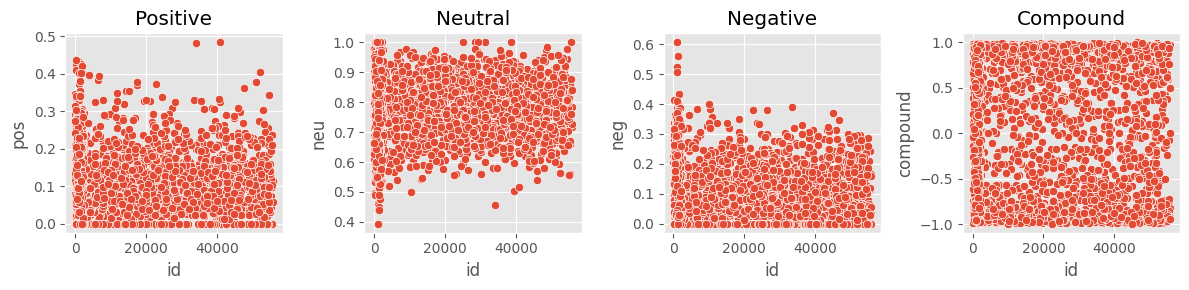

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.scatterplot(data=dfall, x='id', y='pos', ax=axs[0])
sns.scatterplot(data=dfall, x='id', y='neu', ax=axs[1])
sns.scatterplot(data=dfall, x='id', y='neg', ax=axs[2])
sns.scatterplot(data=dfall, x='id', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

# Pattern sentiment

### The dataset contains 'sentiment' column which was calculated using the Pattern sentiment library (created by Smedt and Daelemans, 2012). The Pattern sentiment library is a natural language processing (NLP) toolkit developed as part of the Pattern module. A numerical score between -1 to 1 is assigned as the score where the value represents the strength and the sign represents the sentiment type.

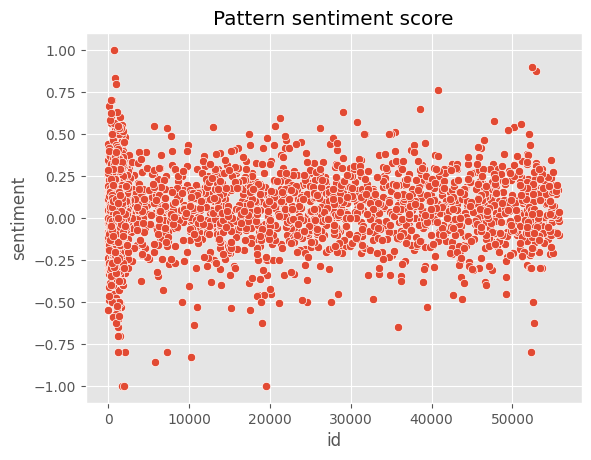

In [44]:
ax = sns.scatterplot(data=dfall, x='id', y='sentiment')
ax.set_title('Pattern sentiment score')
plt.show()

# Pattern sentiment vs Vader sentiment score

### Using the pattern sentiment score column 'sentiment' to plot against the Vader sentiment score.

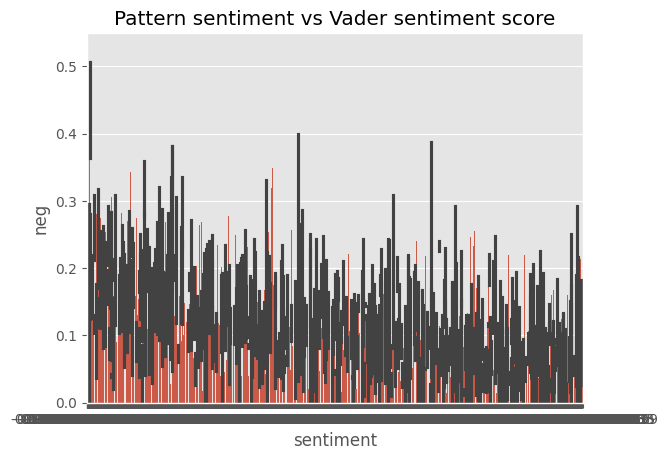

In [45]:
ax = sns.barplot(data=dfall, x='sentiment', y='neg')
ax.set_title('Pattern sentiment vs Vader sentiment score')
plt.show()

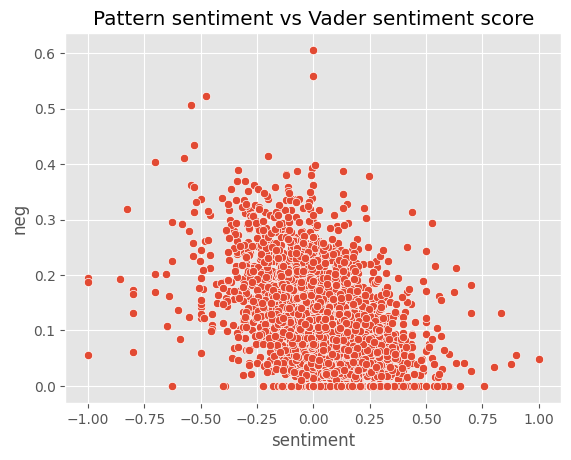

In [46]:
ax = sns.scatterplot(data=dfall, x='sentiment', y='neg')
ax.set_title('Pattern sentiment vs Vader sentiment score')
plt.show()

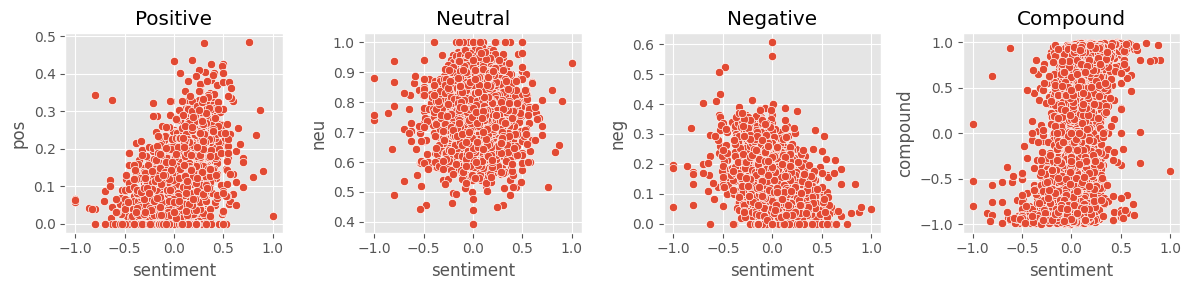

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.scatterplot(data=dfall, x='sentiment', y='pos', ax=axs[0])
sns.scatterplot(data=dfall, x='sentiment', y='neu', ax=axs[1])
sns.scatterplot(data=dfall, x='sentiment', y='neg', ax=axs[2])
sns.scatterplot(data=dfall, x='sentiment', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

# Roberta Model

In [48]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [49]:
MODEL = f"cardiffnlp/twitter-roberta-base-emotion"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


### Test the Roberta Model

In [50]:
ex = "He shouted that I should leave the house and should get lost!"

def roberta_score(sentence):
    enc = tokenizer(sentence, return_tensors='pt')
    op = model(**enc)
    score = op[0][0].detach().numpy()
    score = softmax(score)
    score_dic = {
        'roberta_neg' : score[0],
        'roberta_neu' : score[1],
        'roberta_pos' : score[2]
    }
    return (score_dic)

print(roberta_score(ex))

{'roberta_neg': 0.8666161, 'roberta_neu': 0.018376773, 'roberta_pos': 0.03747617}


### Run on full dataset

In [51]:
roberta_neg = []
roberta_neu = []
roberta_pos = []

for i,row in tqdm(dfall.iterrows(), total=len(dfall)):
    score_dic = roberta_score(row['text'])    
    roberta_neg.append(score_dic['roberta_neg'])
    roberta_neu.append(score_dic['roberta_neu'])
    roberta_pos.append(score_dic['roberta_pos'])

  0%|          | 0/3553 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [52]:
len(roberta_neg)

3553

In [53]:
len(roberta_neu)

3553

In [54]:
len(roberta_pos)

3553

In [55]:
type(roberta_neg)

list

In [56]:
dfall['roberta_neg'] = roberta_neg
dfall['roberta_neu'] = roberta_neu
dfall['roberta_pos'] = roberta_pos

In [57]:
dfall.head()

,id,neg,neu,pos,compound,subreddit,post_id,sentence_range,text,label,...,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,roberta_neg,roberta_neu,roberta_pos
0,33181,0.176,0.731,0.093,-0.8551,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,...,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,0.108009,0.016747,0.040153
1,2606,0.011,0.694,0.295,0.9897,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,...,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,0.035878,0.482399,0.447117
2,38816,0.099,0.814,0.087,-0.0402,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,...,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894,0.965094,0.010629,0.011789
3,239,0.216,0.698,0.086,-0.9933,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,...,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671,0.645645,0.025446,0.010874
4,1421,0.260,0.693,0.047,-0.9622,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,...,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,0.966427,0.003542,0.008983


### Check for issues after appending

In [58]:
dfall.isnull().sum()

id                 0
neg                0
neu                0
pos                0
compound           0
                  ..
syntax_fk_grade    0
sentiment          0
roberta_neg        0
roberta_neu        0
roberta_pos        0
Length: 123, dtype: int64

In [59]:
dfall.isnull().sum().sum()

0

# Vader Plot vs Roberta Plot

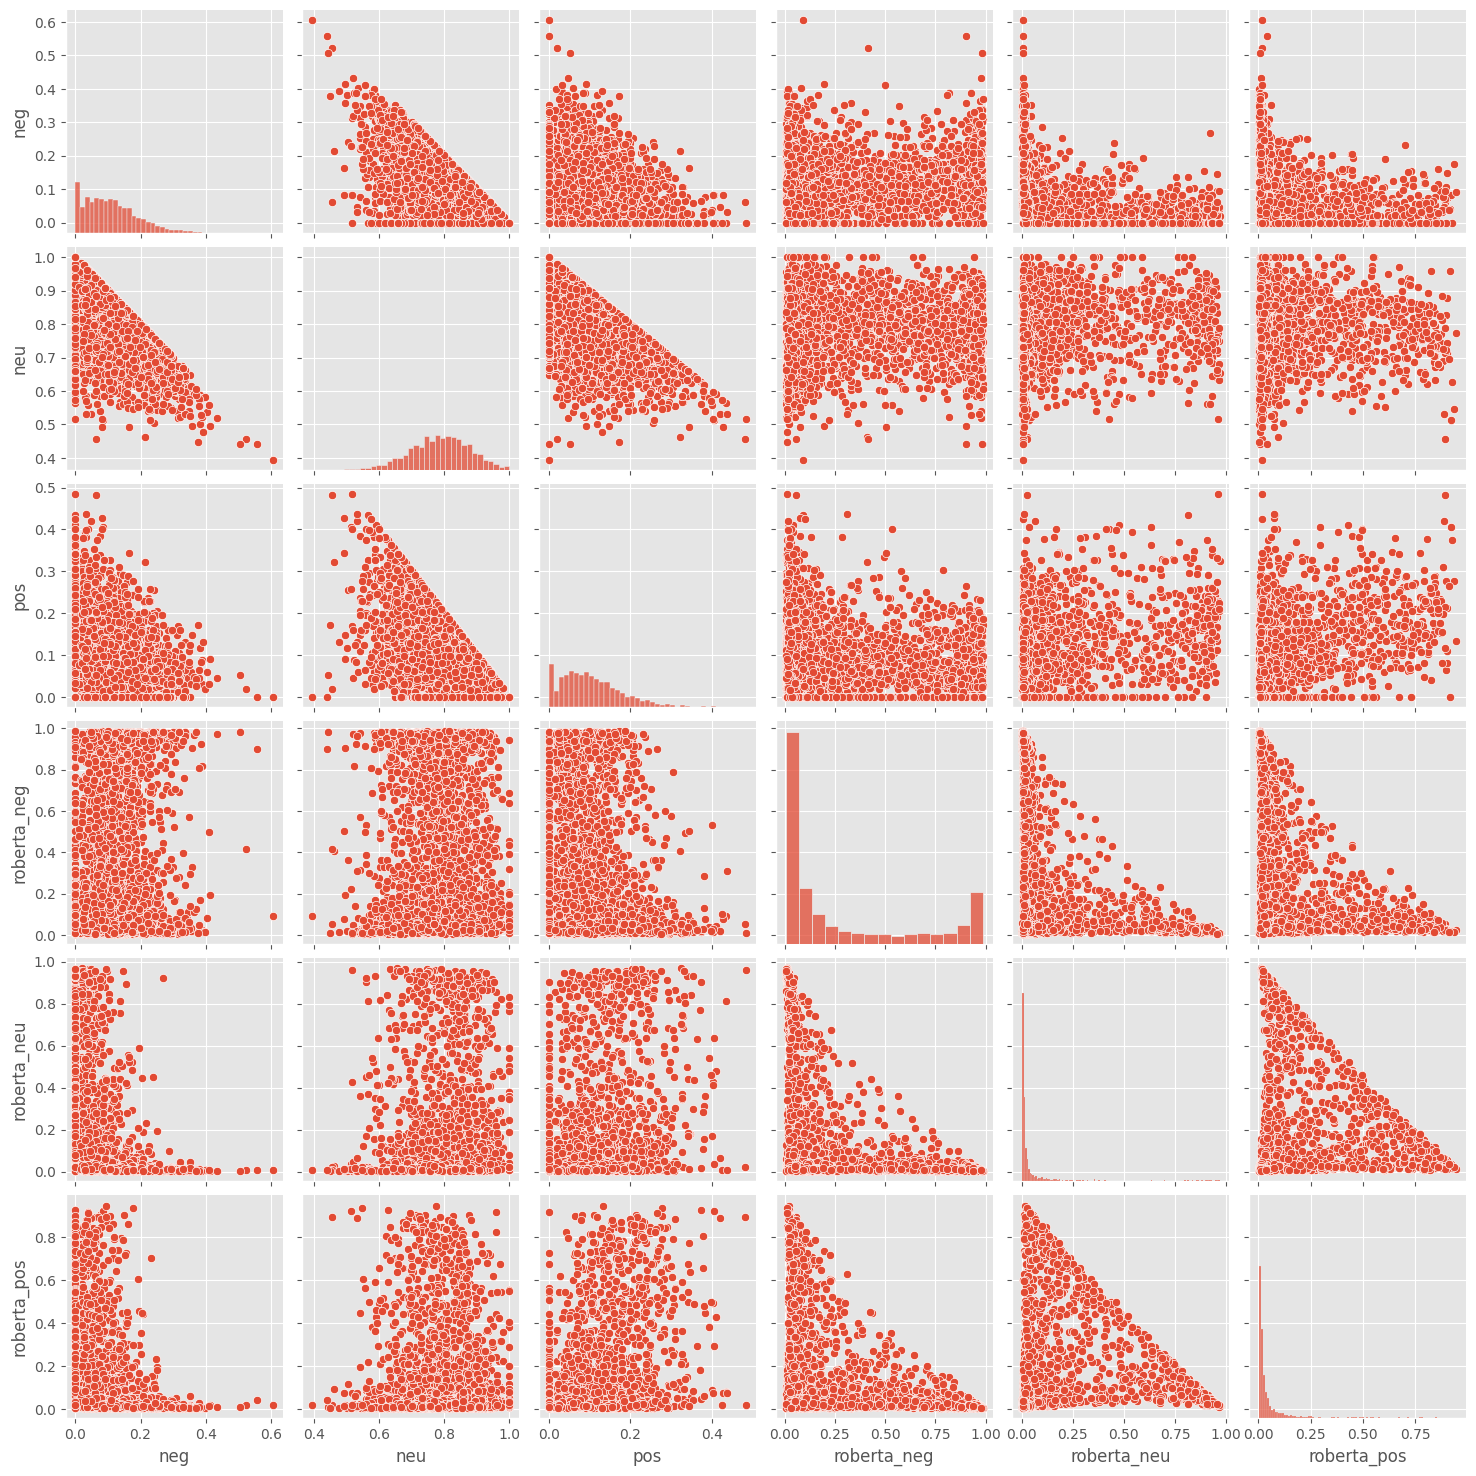

In [60]:
sns.pairplot(data=dfall,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'])
plt.show()

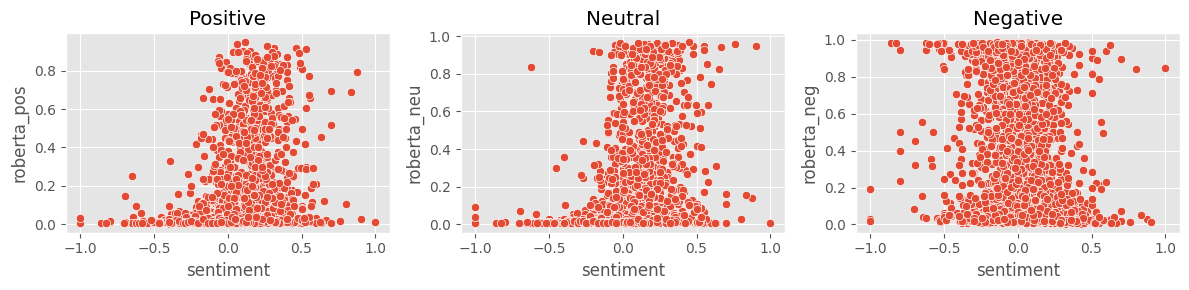

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.scatterplot(data=dfall, x='sentiment', y='roberta_pos', ax=axs[0])
sns.scatterplot(data=dfall, x='sentiment', y='roberta_neu', ax=axs[1])
sns.scatterplot(data=dfall, x='sentiment', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

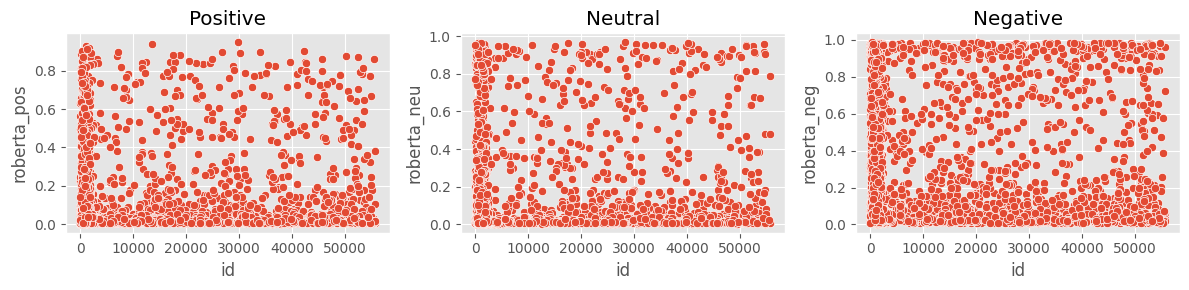

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.scatterplot(data=dfall, x='id', y='roberta_pos', ax=axs[0])
sns.scatterplot(data=dfall, x='id', y='roberta_neu', ax=axs[1])
sns.scatterplot(data=dfall, x='id', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Sentiment Analysis using Transformer Pipeline

In [63]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use mps:0


In [64]:
print(dfall['text'][50])
print()
print(sent_pipeline(dfall['text'][50])[0])

Hey everyone. I need a place to vent and place my feelings because I don't know what to do anymore. This evening while playing a boardgame with my BF and some friends, I found out my BF lied big time. Short: last year we decided that I would join him this year on his skiing trip with his friends (his idea). This wasn't possible in the end (or so he told me) because his friends didn't want to rent a cabin but go on a cheap student skiing trip.

{'label': 'NEGATIVE', 'score': 0.9984727501869202}


In [65]:
dfall['pipeline_score'] = dfall['text'].apply(lambda x: sent_pipeline(x)[0]['score'])

In [66]:
dfall.head()

,id,neg,neu,pos,compound,subreddit,post_id,sentence_range,text,label,...,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,roberta_neg,roberta_neu,roberta_pos,pipeline_score
0,33181,0.176,0.731,0.093,-0.8551,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,...,1.52211,1.89556,0.86,1,3.253573,-0.002742,0.108009,0.016747,0.040153,0.997027
1,2606,0.011,0.694,0.295,0.9897,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,...,1.62045,1.88919,0.65,2,8.828316,0.292857,0.035878,0.482399,0.447117,0.703793
2,38816,0.099,0.814,0.087,-0.0402,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,...,1.58108,1.85828,0.67,0,7.841667,0.011894,0.965094,0.010629,0.011789,0.986328
3,239,0.216,0.698,0.086,-0.9933,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,...,1.52114,1.98848,0.50,5,4.104027,0.141671,0.645645,0.025446,0.010874,0.899043
4,1421,0.260,0.693,0.047,-0.9622,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,...,1.64872,1.81456,1.00,1,7.910952,-0.204167,0.966427,0.003542,0.008983,0.995993


<Axes: ylabel='pipeline_score'>

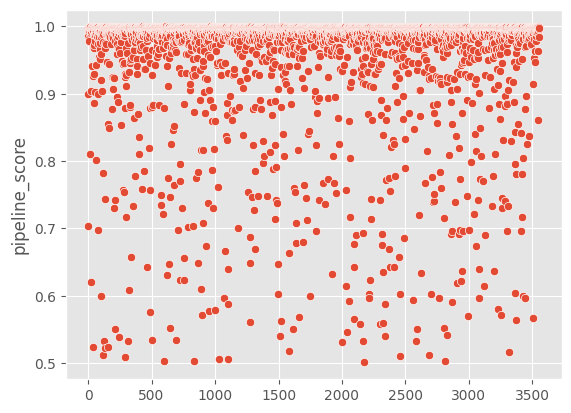

In [67]:
sns.scatterplot(dfall['pipeline_score'])

# Inference

## 1. Vader Analysis
The comments with positive sentiments are not strong or intense. The comments with negative sentiments as well are not strong or intense. The comments with mixed sentiments are either polarised to strong negative or strong positive.

## 2. Pattern Sentiment Analysis
The score suggests that most of the comments are mild negative or mild positive. Hence people are slightly happy or stressed.

## 3. Pattern Sentiment vs Vader Sentiment Score
- The scores align with each other. As expected, the postive vader score increases with the increase in pattern sentiment score.
- The negative vader score decreases (it is a negative score without sign hence increase in value means more negative sentiment) with the decrease in pattern sentiment score.
- Most of the vader neutral comments and vader mix comments are around zero of pattern sentiment score which is also expected.

## 4. Roberta vs Vader Analysis
- Both positive scores are increasing altogether as expected.
- Strength of roberta negative score spans from very negative to less negative comments whereas the vader negative score is less intense mostly.

## 5. Transformer Pipeline Analysis
- It suggests that most of the comments indicate high level of stress.